In [67]:
import pandas as pd 
import numpy as np

In [68]:
ds = pd.read_csv("nursery.csv")

In [69]:
ds.head()

,parents,has_nurs,form_st,children,housing,health,target
0,usual,proper,complete,1,convenient,recommended,recommend
1,usual,proper,complete,1,convenient,priority,priority
2,usual,proper,complete,1,convenient,not_recom,not_recom
3,usual,proper,complete,1,convenient,recommended,recommend
4,usual,proper,complete,1,convenient,priority,priority


In [70]:
l = list(ds.columns)
l


['parents', 'has_nurs', 'form_st', 'children', 'housing', 'health', 'target']

In [71]:
for i in l:
    print("******** Column ",i,"***********")
    print(ds[i].value_counts())
    print() 

******** Column  parents ***********
usual          4320
pretentious    4320
great_pret     4320
Name: parents, dtype: int64

******** Column  has_nurs ***********
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: has_nurs, dtype: int64

******** Column  form_st ***********
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: form_st, dtype: int64

******** Column  children ***********
1       3240
2       3240
3       3240
more    3240
Name: children, dtype: int64

******** Column  housing ***********
convenient    4320
less_conv     4320
critical      4320
Name: housing, dtype: int64

******** Column  health ***********
recommended    4320
priority       4320
not_recom      4320
Name: health, dtype: int64

******** Column  target ***********
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: target, dtype: int64



In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le_parents = LabelEncoder()
le_has_nurs = LabelEncoder()
le_form_st  = LabelEncoder()
le_children  = LabelEncoder()
# le_housing = LabelEncoder()
# le_finance = LabelEncoder()
# le_social = LabelEncoder()
# le_health = LabelEncoder()
le_target = LabelEncoder()

In [74]:
ds['parents_n'] = le_parents.fit_transform(ds['parents'])
ds['has_nurs_n'] = le_has_nurs.fit_transform(ds['has_nurs'])
ds['form_st_n'] = le_form_st.fit_transform(ds['form_st'])
ds['children_n'] = le_children.fit_transform(ds['children'])
# ds['housing_n'] = le_housing.fit_transform(ds['housing'])
# ds['finance_n'] = le_finance.fit_transform(ds['finance'])
# ds['social_n'] = le_social.fit_transform(ds['social'])
# ds['health_n'] = le_health.fit_transform(ds['health'])
ds['target_n'] = le_target.fit_transform(ds['target'])
ds.head()

,parents,has_nurs,form_st,children,housing,health,target,parents_n,has_nurs_n,form_st_n,children_n,target_n
0,usual,proper,complete,1,convenient,recommended,recommend,2,3,0,0,2
1,usual,proper,complete,1,convenient,priority,priority,2,3,0,0,1
2,usual,proper,complete,1,convenient,not_recom,not_recom,2,3,0,0,0
3,usual,proper,complete,1,convenient,recommended,recommend,2,3,0,0,2
4,usual,proper,complete,1,convenient,priority,priority,2,3,0,0,1


In [75]:
le_housing = LabelEncoder()
le_health = LabelEncoder()

In [76]:
ds['housing_n'] = le_housing.fit_transform(ds['housing'])
ds['health_n'] = le_health.fit_transform(ds['health'])
ds.head()

,parents,has_nurs,form_st,children,housing,health,target,parents_n,has_nurs_n,form_st_n,children_n,target_n,housing_n,health_n
0,usual,proper,complete,1,convenient,recommended,recommend,2,3,0,0,2,0,2
1,usual,proper,complete,1,convenient,priority,priority,2,3,0,0,1,0,1
2,usual,proper,complete,1,convenient,not_recom,not_recom,2,3,0,0,0,0,0
3,usual,proper,complete,1,convenient,recommended,recommend,2,3,0,0,2,0,2
4,usual,proper,complete,1,convenient,priority,priority,2,3,0,0,1,0,1


In [77]:
ds.dtypes

parents       object
has_nurs      object
form_st       object
children      object
housing       object
health        object
target        object
parents_n      int32
has_nurs_n     int32
form_st_n      int32
children_n     int32
target_n       int32
housing_n      int32
health_n       int32
dtype: object

In [78]:
x = ds.drop(['parents','has_nurs','form_st','children','housing','health','target'], axis=1)
y = ds['target']
x

,parents_n,has_nurs_n,form_st_n,children_n,target_n,housing_n,health_n
0,2,3,0,0,2,0,2
1,2,3,0,0,1,0,1
2,2,3,0,0,0,0,0
3,2,3,0,0,2,0,2
4,2,3,0,0,1,0,1
...,...,...,...,...,...,...,...
12955,0,4,2,3,3,1,1
12956,0,4,2,3,0,1,0
12957,0,4,2,3,3,1,2
12958,0,4,2,3,3,1,1


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
len(x_train)

9072

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [81]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9994855967078189


In [82]:
from sklearn.tree import DecisionTreeClassifier #for checking testing results

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (10368, 7)
Testing split input-  (2592, 7)


In [84]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [85]:
# Predicting the values of test data
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       870
    priority       1.00      1.00      1.00       873
   recommend       0.00      0.00      0.00         2
  spec_prior       1.00      1.00      1.00       785
  very_recom       1.00      1.00      1.00        62

    accuracy                           1.00      2592
   macro avg       0.80      0.80      0.80      2592
weighted avg       1.00      1.00      1.00      2592



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Score: 0.9992283950617284')

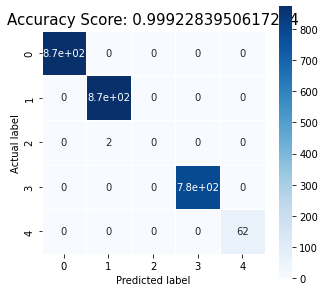

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)